## Problem 2.2 (Exploring fish sleep data)

In [47]:
import numpy as np
import pandas as pd
import itertools

import altair as alt
import bokeh.io

import bebi103
import altair_catplot as altcat

bokeh.io.output_notebook()

alt.data_transformers.enable('json')

Loading BokehJS ...

DataTransformerRegistry.enable('json')

In [48]:
df_gt = pd.read_csv('~/git/02-bebi103-2018/data/130315_1A_genotypes.txt',
                    delimiter='\t',
                    comment='#',
                    header=[0, 1])
# Take a look
df_gt.head()

,Genotype1,Genotype2,Genotype3
,WT 17,Het 34,Mut 22
0,2.0,1,4.0
1,14.0,3,11.0
2,18.0,5,12.0
3,24.0,6,13.0
4,28.0,8,20.0


In [49]:
# Reset the columns to be the second level of indexing
df_gt.columns = df_gt.columns.get_level_values(1)

# Check out the new columns
df_gt.columns

Index(['WT 17', 'Het 34', 'Mut 22'], dtype='object')

In [50]:
df_gt.columns = ['wt', 'het', 'mut']


In [51]:
# Tidy the DataFrame
df_gt = pd.melt(df_gt, var_name='genotype', value_name='location')

# Take a look
df_gt.head()

,genotype,location
0,wt,2.0
1,wt,14.0
2,wt,18.0
3,wt,24.0
4,wt,28.0


In [52]:
# Drop all rows that have a NaN in them
df_gt = df_gt.dropna()

# Take a look
df_gt.head()

,genotype,location
0,wt,2.0
1,wt,14.0
2,wt,18.0
3,wt,24.0
4,wt,28.0


In [53]:
df_gt = df_gt.reset_index(drop=True)


In [54]:
df_gt.loc[:,'location'] = df_gt.loc[:, 'location'].astype(int)


In [55]:
df = pd.read_csv('../data/130315_1A_aanat2.csv', comment='#')

# Take a look
df.head()

,location,activity,time,zeit,zeit_ind,day
0,1,0.6,2013-03-15 18:31:09,-14.480833,-869,4
1,2,1.4,2013-03-15 18:31:09,-14.480833,-869,4
2,3,0.0,2013-03-15 18:31:09,-14.480833,-869,4
3,4,0.0,2013-03-15 18:31:09,-14.480833,-869,4
4,5,0.0,2013-03-15 18:31:09,-14.480833,-869,4


In [56]:
df = pd.merge(df, df_gt)

# Take a look
df.head()

,location,activity,time,zeit,zeit_ind,day,genotype
0,1,0.6,2013-03-15 18:31:09,-14.480833,-869,4,het
1,1,1.9,2013-03-15 18:32:09,-14.464167,-868,4,het
2,1,1.9,2013-03-15 18:33:09,-14.447500,-867,4,het
3,1,13.4,2013-03-15 18:34:09,-14.430833,-866,4,het
4,1,15.4,2013-03-15 18:35:09,-14.414167,-865,4,het


In [57]:
df['time'] = pd.to_datetime(df['time'])

In [58]:
df['time'].dt.time.head()

0    18:31:09
1    18:32:09
2    18:33:09
3    18:34:09
4    18:35:09
Name: time, dtype: object

In [59]:
df['light'] = (  (df['time'].dt.time >= pd.to_datetime('9:00:00').time())
               & (df['time'].dt.time < pd.to_datetime('23:00:00').time()))

# Take a look
df.head()

,location,activity,time,zeit,zeit_ind,day,genotype,light
0,1,0.6,2013-03-15 18:31:09,-14.480833,-869,4,het,True
1,1,1.9,2013-03-15 18:32:09,-14.464167,-868,4,het,True
2,1,1.9,2013-03-15 18:33:09,-14.447500,-867,4,het,True
3,1,13.4,2013-03-15 18:34:09,-14.430833,-866,4,het,True
4,1,15.4,2013-03-15 18:35:09,-14.414167,-865,4,het,True


In [60]:
# Calculate the median activity for each genotype 

median_df = df.groupby(['genotype', 'zeit_ind']).median().reset_index()

del median_df['location']

In [61]:
median_df.head()

,genotype,zeit_ind,activity,zeit,day,light
0,het,-869,0.0,-14.480833,4,True
1,het,-868,0.0,-14.464167,4,True
2,het,-867,0.0,-14.447500,4,True
3,het,-866,0.0,-14.430833,4,True
4,het,-865,0.0,-14.414167,4,True


In [62]:
# define a function that use the condion of activity to generate a new column

def label_activity(c):
    if c['activity'] > 10:
        return'high'
    if (c['activity'] <= 10) & (c['activity'] > 0):
        return'low'
    if c['activity'] == 0:
        return'in'

In [63]:
median_df['type'] = median_df.apply(label_activity, axis = 1)
median_df.head()

,genotype,zeit_ind,activity,zeit,day,light,type
0,het,-869,0.0,-14.480833,4,True,in
1,het,-868,0.0,-14.464167,4,True,in
2,het,-867,0.0,-14.447500,4,True,in
3,het,-866,0.0,-14.430833,4,True,in
4,het,-865,0.0,-14.414167,4,True,in


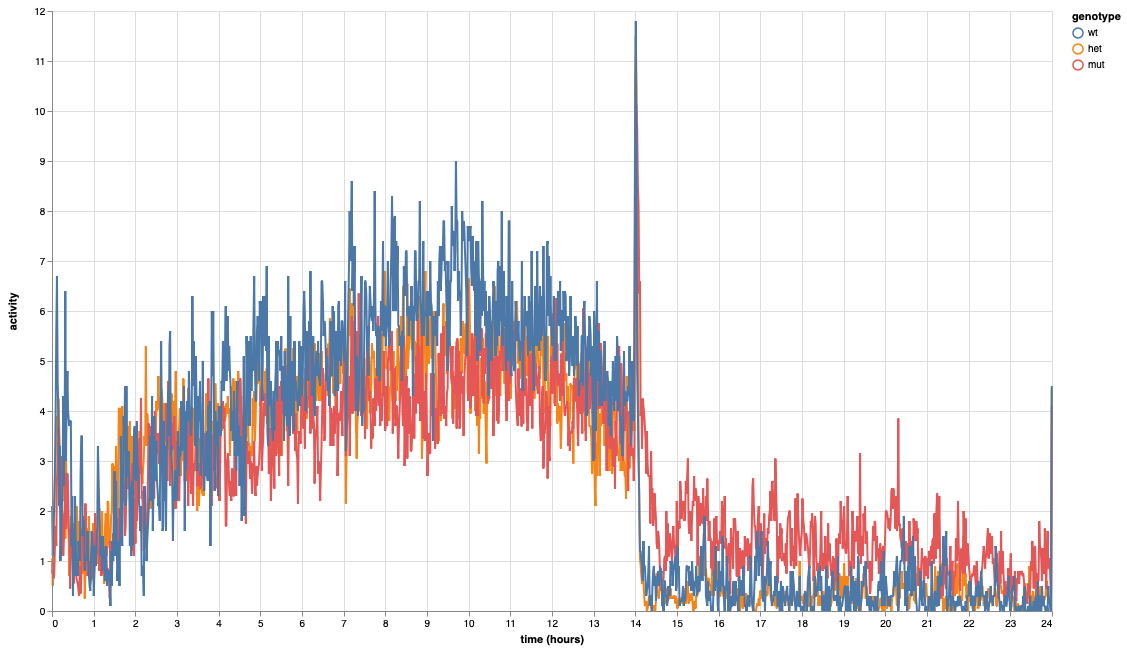

In [64]:
# Only extract the data of day5 (which is the agreement among zebrafish community)
inds = median_df['day'] == 5

alt.Chart(median_df.loc[inds,:], height = 600, width = 1000
    ).mark_line(
        strokeJoin='bevel'
    ).encode(
        x=alt.X('zeit:Q', title='time (hours)'),
        y=alt.Y('activity:Q'),
        color=alt.Color('genotype:N', sort=['wt', 'het', 'mut']),
        order='zeit:Q'
    )

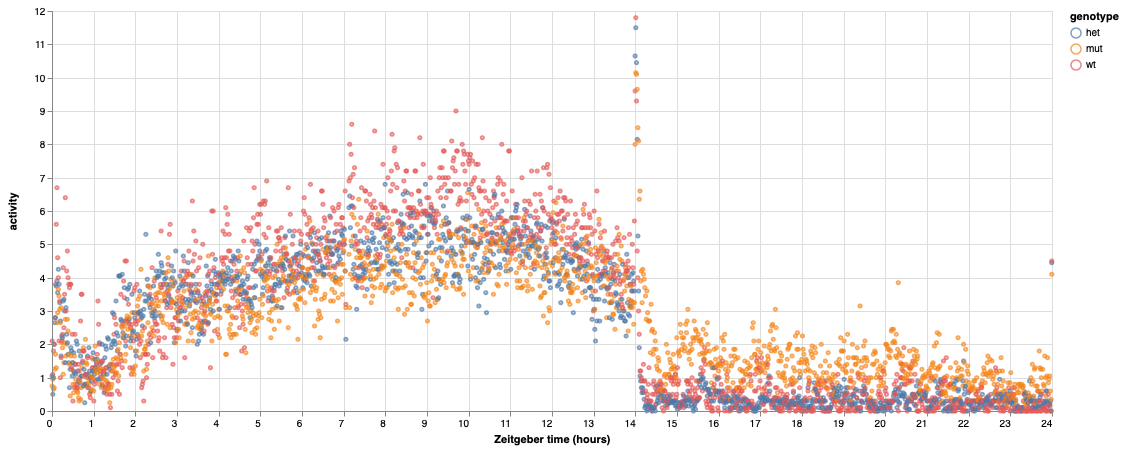

In [65]:
alt.Chart(median_df.loc[median_df['day']==5, :], 
          height=400, 
          width=1000
         ).mark_point(
            size=10
         ).encode(
             x=alt.X('zeit:Q', title='Zeitgeber time (hours)'),
             y=alt.Y('activity:Q'),
             color ='genotype:N',
             order = 'zeit:Q'
         )       

In [66]:
median_df.loc[inds,:].head()

,genotype,zeit_ind,activity,zeit,day,light,type
869,het,0,1.05,0.002500,5,True,low
870,het,1,0.50,0.019167,5,True,low
871,het,2,1.00,0.035833,5,True,low
872,het,3,2.00,0.052500,5,True,low
873,het,4,2.65,0.069167,5,True,low


in the paper, they defined resting bout as below:
'Any 1 min bin with zero detectable movement was considered 1 min of rest, a rest bout was defined as a continuous string of rest minutes'
And we decide to defined a sleep bout as 3 minutes of resting minutes

In [67]:
median_df = median_df.sort_values(by=['genotype', 'zeit_ind'])
median_df.head()


,genotype,zeit_ind,activity,zeit,day,light,type
0,het,-869,0.0,-14.480833,4,True,in
1,het,-868,0.0,-14.464167,4,True,in
2,het,-867,0.0,-14.447500,4,True,in
3,het,-866,0.0,-14.430833,4,True,in
4,het,-865,0.0,-14.414167,4,True,in


In [68]:
# Create GroupBy object
grouped = median_df.groupby('genotype')['zeit_ind', 'activity']

# Make a RollingGroupby with window size of 2.
rolling = grouped.rolling(window=2, on='zeit_ind')

# Look at rolling object
rolling

RollingGroupby [window=2,center=False,axis=0,on=zeit_ind]

In [69]:
median_df_rolling = rolling.sum()

# Take a look
median_df_rolling.head()


zeit_ind  activity
genotype                      
het      0      -869       NaN
         1      -868       0.0
         2      -867       0.0
         3      -866       0.0
         4      -865       0.0

In [70]:
median_df_rolling = median_df_rolling.reset_index(level=0)
median_df_rolling.head()

,genotype,zeit_ind,activity
0,het,-869,NaN
1,het,-868,0.0
2,het,-867,0.0
3,het,-866,0.0
4,het,-865,0.0


In [71]:
median_df['rolling_activity (sec/2min)'] = median_df_rolling['activity']

median_df.loc[median_df['day'] == 5].head()


,genotype,zeit_ind,activity,zeit,day,light,type,rolling_activity (sec/2min)
869,het,0,1.05,0.002500,5,True,low,2.10
870,het,1,0.50,0.019167,5,True,low,1.55
871,het,2,1.00,0.035833,5,True,low,1.50
872,het,3,2.00,0.052500,5,True,low,3.00
873,het,4,2.65,0.069167,5,True,low,4.65


In [83]:
# define a function that use the condion of 2minutes of no movement to generate a new column

def label_sleep_bout(c):
    if c['rolling_activity (sec/2min)'] < 0.2:
        return 1
    else:
        return 0

In [84]:
median_df['sleep'] = median_df.apply(label_sleep_bout, axis = 1)
median_df.loc[median_df['day']==5].head()

,genotype,zeit_ind,activity,zeit,day,light,type,rolling_activity (sec/2min),sleep
869,het,0,1.05,0.002500,5,True,low,2.10,0
870,het,1,0.50,0.019167,5,True,low,1.55,0
871,het,2,1.00,0.035833,5,True,low,1.50,0
872,het,3,2.00,0.052500,5,True,low,3.00,0
873,het,4,2.65,0.069167,5,True,low,4.65,0


In [85]:
sleep = median_df.loc[median_df['day']==5].groupby(['genotype', 'light']).sum()
sleep

zeit_ind  activity          zeit   day  \
genotype light                                           
het      False    684300    239.40  11401.666667  3000   
         True     351518   3358.30   5857.398889  4185   
mut      False    684300    850.45  11401.666667  3000   
         True     351518   3003.50   5857.398889  4185   
wt       False    684300    278.40  11401.666667  3000   
         True     351518   3892.90   5857.398889  4185   

                rolling_activity (sec/2min)  sleep  
genotype light                                      
het      False                       485.00     74  
         True                       6707.00      0  
mut      False                      1704.80      0  
         True                       6000.25      0  
wt       False                       561.90    121  
         True                       7777.20      0

In [75]:
# to see each fish has how many sleep bouts at day5

df.head()

,location,activity,time,zeit,zeit_ind,day,genotype,light
0,1,0.6,2013-03-15 18:31:09,-14.480833,-869,4,het,True
1,1,1.9,2013-03-15 18:32:09,-14.464167,-868,4,het,True
2,1,1.9,2013-03-15 18:33:09,-14.447500,-867,4,het,True
3,1,13.4,2013-03-15 18:34:09,-14.430833,-866,4,het,True
4,1,15.4,2013-03-15 18:35:09,-14.414167,-865,4,het,True


In [76]:
# Create GroupBy object
grouped1 = df.groupby('location')['zeit_ind', 'activity']

# Make a RollingGroupby with window size of 3.
rolling1 = grouped1.rolling(window=2, on='zeit_ind')

# Look at rolling object
rolling1

RollingGroupby [window=2,center=False,axis=0,on=zeit_ind]

In [77]:
df_rolling = rolling1.sum()

df_rolling.head()

zeit_ind  activity
location                      
1        0      -869       NaN
         1      -868       2.5
         2      -867       3.8
         3      -866      15.3
         4      -865      28.8

In [78]:
df_rolling = df_rolling.reset_index(level=0)
df_rolling.head()

,location,zeit_ind,activity
0,1,-869,NaN
1,1,-868,2.5
2,1,-867,3.8
3,1,-866,15.3
4,1,-865,28.8


In [79]:
df['rolling_activity (sec/2min)'] = df_rolling['activity']
df.head()

,location,activity,time,zeit,zeit_ind,day,genotype,light,rolling_activity (sec/2min)
0,1,0.6,2013-03-15 18:31:09,-14.480833,-869,4,het,True,NaN
1,1,1.9,2013-03-15 18:32:09,-14.464167,-868,4,het,True,2.5
2,1,1.9,2013-03-15 18:33:09,-14.447500,-867,4,het,True,3.8
3,1,13.4,2013-03-15 18:34:09,-14.430833,-866,4,het,True,15.3
4,1,15.4,2013-03-15 18:35:09,-14.414167,-865,4,het,True,28.8


In [80]:
df['sleep'] = df.apply(label_sleep_bout, axis = 1)
df.head()

,location,activity,time,zeit,zeit_ind,day,genotype,light,rolling_activity (sec/2min),sleep
0,1,0.6,2013-03-15 18:31:09,-14.480833,-869,4,het,True,NaN,0
1,1,1.9,2013-03-15 18:32:09,-14.464167,-868,4,het,True,2.5,0
2,1,1.9,2013-03-15 18:33:09,-14.447500,-867,4,het,True,3.8,0
3,1,13.4,2013-03-15 18:34:09,-14.430833,-866,4,het,True,15.3,0
4,1,15.4,2013-03-15 18:35:09,-14.414167,-865,4,het,True,28.8,0


In [81]:
sleep_each = df.loc[df['day']==5].groupby(['location','genotype', 'light']).sum().reset_index()
sleep_each.head()

,location,genotype,light,activity,zeit,zeit_ind,day,rolling_activity (sec/2min),sleep
0,1,het,False,725.8,11401.666667,684300,3000,1457.4,106
1,1,het,True,3411.5,5857.398889,351518,4185,6812.5,75
2,2,wt,False,325.5,11401.666667,684300,3000,656.1,299
3,2,wt,True,5136.6,5857.398889,351518,4185,10264.3,11
4,3,het,False,310.5,11401.666667,684300,3000,627.3,352


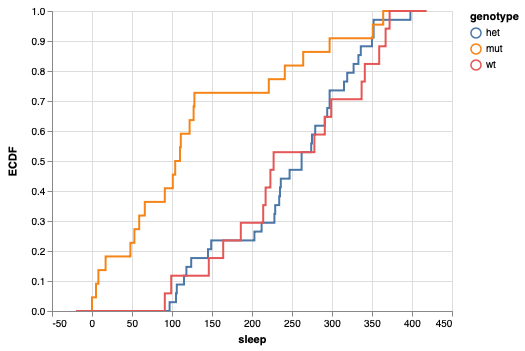

In [82]:
altcat.catplot(data= sleep_each.loc[sleep_each['light'] == False, :],
               mark='line',
               encoding=dict(x='sleep:Q',
                             color=alt.Color('genotype:N')),
               transform='ecdf')
